# Importing data from directory

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(r"C:\Users\mohsi\Downloads\Project\reddit_multiple_subreddits_data.csv")

df.head()

,subreddit,post_title,post_author,post_url,post_score,post_timestamp,comment_text,comment_author,comment_timestamp,comment_id
0,datascience,data siens,NaN,https://dslntlv9vhjr4.cloudfront.net/posts_ima...,4107,2020-12-07 19:49:55,I was once reading this article that went as: ...,NaN,2020-12-07 23:01:22,geztmaf
1,datascience,data siens,NaN,https://dslntlv9vhjr4.cloudfront.net/posts_ima...,4107,2020-12-07 19:49:55,How do you change your setup on Jupyter to loo...,skunk_jh,2020-12-07 21:52:45,gezlshj
2,datascience,data siens,NaN,https://dslntlv9vhjr4.cloudfront.net/posts_ima...,4107,2020-12-07 19:49:55,The reality of 9/10 data scientist job specs!,under_a_palm_tree,2020-12-07 21:42:46,gezknj2
3,datascience,data siens,NaN,https://dslntlv9vhjr4.cloudfront.net/posts_ima...,4107,2020-12-07 19:49:55,oh fuck 😂😂😂this had no business to be funny,nonothepeach,2020-12-07 20:53:47,gezezaw
4,datascience,data siens,NaN,https://dslntlv9vhjr4.cloudfront.net/posts_ima...,4107,2020-12-07 19:49:55,ARtYfIshaL NtEliGeNtS,teetaps,2020-12-07 21:13:16,gezh9c9


## Cleaning the data

In [3]:
df.shape

(79291, 10)

In [4]:
df.isnull().sum()

subreddit               0
post_title              0
post_author          2570
post_url                0
post_score              0
post_timestamp          0
comment_text            2
comment_author       8062
comment_timestamp       0
comment_id              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

subreddit            0
post_title           0
post_author          0
post_url             0
post_score           0
post_timestamp       0
comment_text         0
comment_author       0
comment_timestamp    0
comment_id           0
dtype: int64

## Removing stopwords , special chars , emojis and links from comment_text using lemmetization technique 

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\W', ' ', text)  # Remove special chars
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Stopwords + Lemmatization
    return ' '.join(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohsi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df['lemm_comments'] = df['comment_text'].apply(clean_text)

In [9]:
df.head()

,subreddit,post_title,post_author,post_url,post_score,post_timestamp,comment_text,comment_author,comment_timestamp,comment_id,lemm_comments
74,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,Upper management doesn't care.,hokie47,2021-07-05 21:42:14,h465o84,upper management care
75,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,real pros just switch to α=0.1 \neasy,longneck_littlefoot,2021-07-05 21:16:43,h462qaa,real pro switch α 0 1 easy
76,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,How many of you are using p values in industry?,ronkochu,2021-07-05 21:44:42,h465ybj,many using p value industry
77,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,No one is happy with an insignificant little p,chuuhruhul,2021-07-05 22:17:03,h469mjg,one happy insignificant little p
78,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,Lol RA Fisher and his arbitrary number.,BobDope,2021-07-05 21:16:59,h462rdo,lol ra fisher arbitrary number


In [10]:
df['lemm_comments']

74                                   upper management care
75                              real pro switch α 0 1 easy
76                             many using p value industry
77                        one happy insignificant little p
78                          lol ra fisher arbitrary number
                               ...                        
79285                                                     
79287    would think demonstrate person video contestin...
79288    upset stupid meme clearly making fun people angry
79289    making fun dehumanising woman porn misogyny me...
79290    men never objectified online woman unfunny uns...
Name: lemm_comments, Length: 69198, dtype: object

## Converting the data into vector form so that we can get the accurate sentiment and also we can train forecasting model according to it

In [11]:
from gensim.models import Word2Vec

# 1. Ensure df['lemm_comments'] is a list of tokenized words
sentiments = df['lemm_comments'].apply(lambda x: x.split())  # Tokenization (Convert to List of Lists)

# 2. Train Word2Vec Model
model = Word2Vec(sentiments, vector_size=50, min_count=1, workers=4)

# 3. Get vector for a specific word (e.g., "good")
word_vector = model.wv["good"]  # This will return the numerical vector for "good"

# 4. Get vector for a whole sentence (Optional)
sentence_vector = [model.wv[word] for word in sentiments.iloc[0] if word in model.wv]

## Analyzing Sentiments in comment_text 

In [12]:
# To get the sentinment score as positive,negative or neutral
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']  # Extract compound score
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [13]:
df['sentiment'] = df['lemm_comments'].apply(classify_sentiment)

In [14]:
df.head()

,subreddit,post_title,post_author,post_url,post_score,post_timestamp,comment_text,comment_author,comment_timestamp,comment_id,lemm_comments,sentiment
74,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,Upper management doesn't care.,hokie47,2021-07-05 21:42:14,h465o84,upper management care,Positive
75,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,real pros just switch to α=0.1 \neasy,longneck_littlefoot,2021-07-05 21:16:43,h462qaa,real pro switch α 0 1 easy,Positive
76,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,How many of you are using p values in industry?,ronkochu,2021-07-05 21:44:42,h465ybj,many using p value industry,Positive
77,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,No one is happy with an insignificant little p,chuuhruhul,2021-07-05 22:17:03,h469mjg,one happy insignificant little p,Positive
78,datascience,The pain and excitement,Kent-Clark-,https://i.redd.it/yqnunwryjg971.jpg,3919,2021-07-05 20:57:20,Lol RA Fisher and his arbitrary number.,BobDope,2021-07-05 21:16:59,h462rdo,lol ra fisher arbitrary number,Positive


In [15]:
df['sentiment'].value_counts()

sentiment
Positive    31906
Neutral     22284
Negative    15008
Name: count, dtype: int64

### Now we need to check the sentiments according to yearly , monthly and daily

In [16]:
df['post_timestamp'] = pd.to_datetime(df['post_timestamp'])

In [17]:
df['post_year'] = df['post_timestamp'].dt.year

In [18]:
fig = go.Figure(go.Funnelarea(
    text =df['sentiment'].value_counts().index,
    values = df['sentiment'].value_counts(),
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

Sentiments according to year

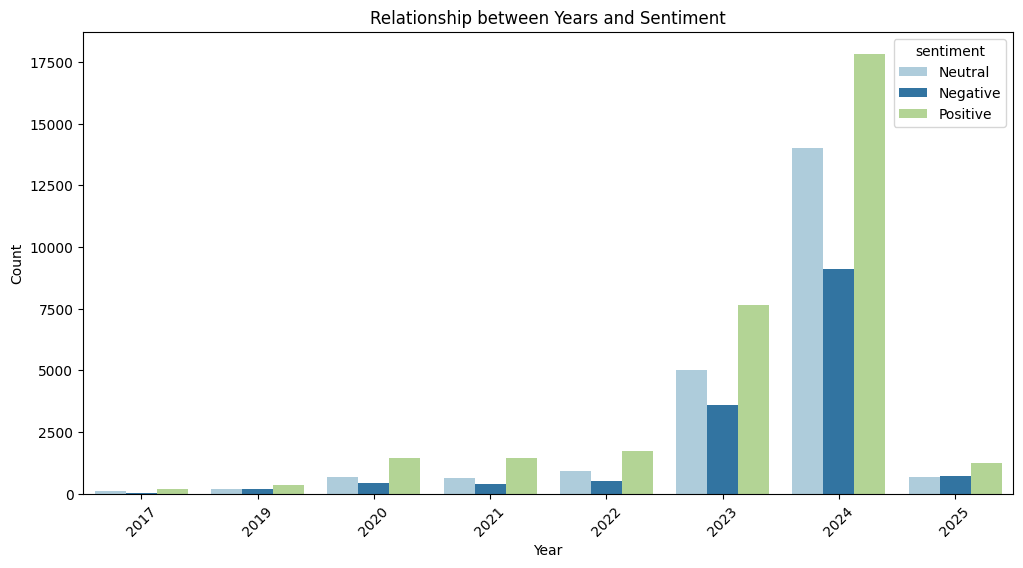

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='post_year', hue='sentiment', data=df, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Sentiments according to Month

In [20]:
df['post_month'] = df['post_timestamp'].dt.month_name()

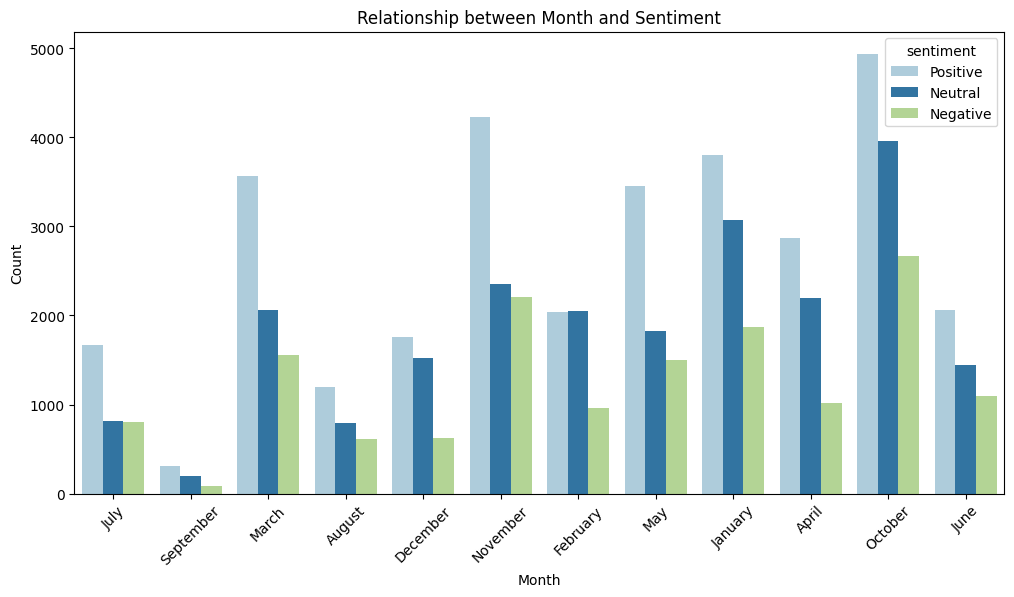

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='post_month', hue='sentiment', data=df, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [22]:
df['subreddit'].value_counts()

subreddit
chatgpt            58381
machinelearning     6339
datascience         4478
Name: count, dtype: int64

Sentiments as day of the week 

In [23]:
df['post_day'] = df['post_timestamp'].dt.day_name()

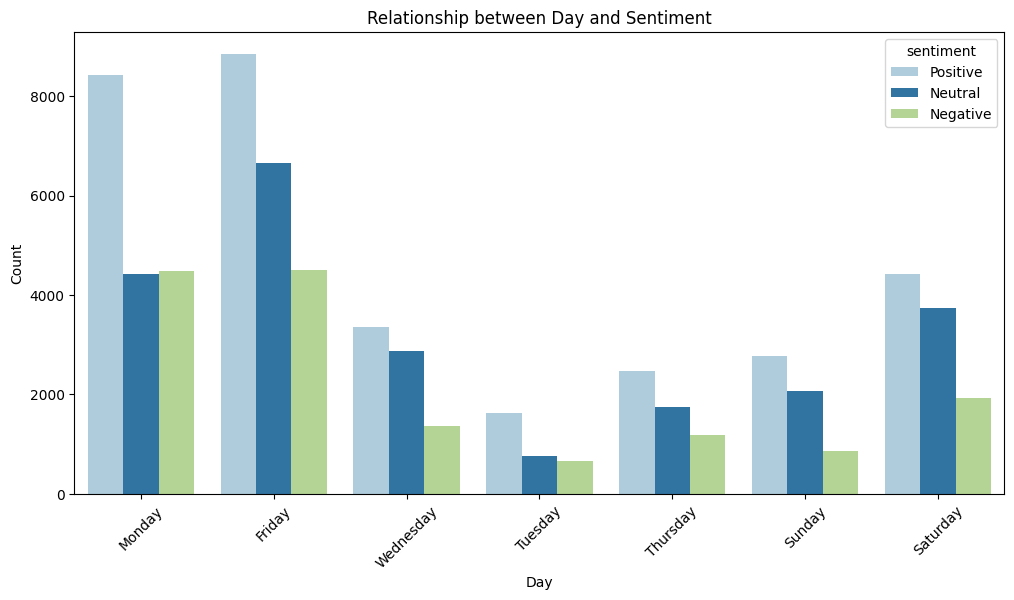

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='post_day', hue='sentiment', data=df, palette='Paired')
plt.title('Relationship between Day and Sentiment')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Sentiments According to topics

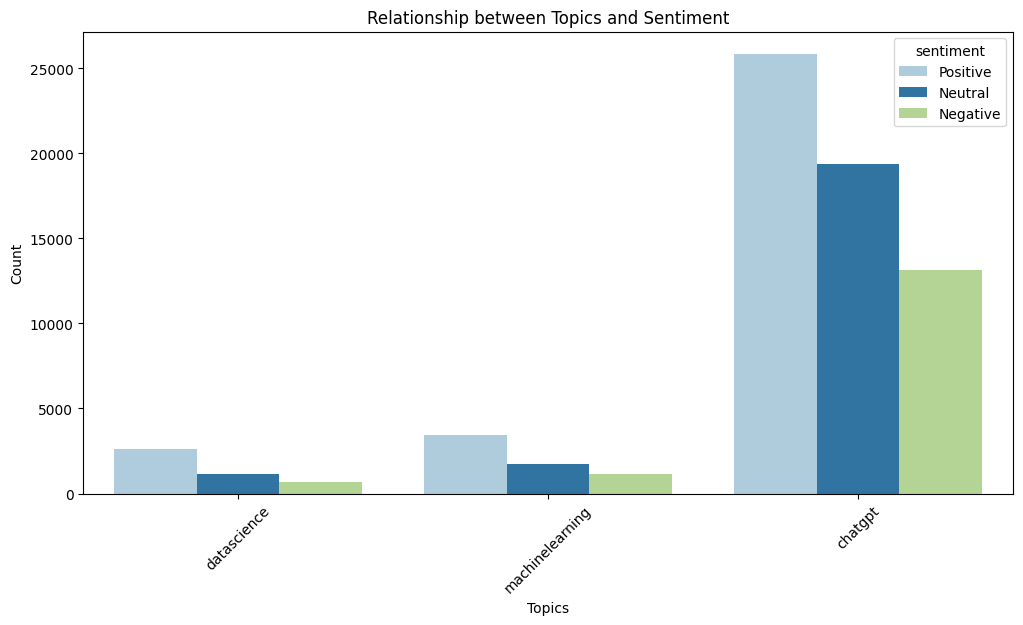

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subreddit', hue='sentiment', data=df, palette='Paired')
plt.title('Relationship between Topics and Sentiment')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
df.columns

Index(['subreddit', 'post_title', 'post_author', 'post_url', 'post_score',
       'post_timestamp', 'comment_text', 'comment_author', 'comment_timestamp',
       'comment_id', 'lemm_comments', 'sentiment', 'post_year', 'post_month',
       'post_day'],
      dtype='object')

## Now we need to create another df to train the forecasting model like ARIMA and Prophet in which we can use the sentiments according to their timestamp

In [27]:
df2 = df[['post_timestamp' , 'sentiment']]

In [28]:
df2.head()

,post_timestamp,sentiment
74,2021-07-05 20:57:20,Positive
75,2021-07-05 20:57:20,Positive
76,2021-07-05 20:57:20,Positive
77,2021-07-05 20:57:20,Positive
78,2021-07-05 20:57:20,Positive


In [29]:
df2.isnull().sum()

post_timestamp    0
sentiment         0
dtype: int64

Extracting only date from timestamp for better predictions

In [30]:
df2['post_timestamp'] = pd.to_datetime(df2['post_timestamp'],errors='coerce')

In [31]:
df2['post_date'] = df2['post_timestamp'].dt.date

In [32]:
df2.head()

,post_timestamp,sentiment,post_date
74,2021-07-05 20:57:20,Positive,2021-07-05
75,2021-07-05 20:57:20,Positive,2021-07-05
76,2021-07-05 20:57:20,Positive,2021-07-05
77,2021-07-05 20:57:20,Positive,2021-07-05
78,2021-07-05 20:57:20,Positive,2021-07-05


In [33]:
df2.drop(columns='post_timestamp',inplace=True)

Now we encoding the sentiments as 0:Negative , 1:Positive , 2:Neutral

In [34]:
df2['sentiment'] = df2['sentiment'].astype(str)

sentiment_mapping = {'Negative':0 , 'Positive':1 , 'Neutral':2}

df2['sentiment'] = df2['sentiment'].map(sentiment_mapping)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69198 entries, 74 to 79290
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  69198 non-null  int64 
 1   post_date  69198 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


Resampling data as per daily aggregation to get average daily sentiments 

In [36]:
df2['post_date'] = pd.to_datetime(df2['post_date'], errors='coerce')  # Ensure date column is datetime
daily_sentiment = df2.groupby('post_date')['sentiment'].mean()  # Aggregation

In [37]:
df2 = df2.set_index('post_date')

# Daily Aggregation
daily_sentiment = df2.resample('D').mean().fillna(method='ffill')  # 'D' means daily aggregation

In [38]:
df2

,sentiment
post_date,
2021-07-05,1
2021-07-05,1
2021-07-05,1
2021-07-05,1
2021-07-05,1
...,...
2024-08-25,2
2024-08-25,1
2024-08-25,0


In [39]:
daily_sentiment.isnull().sum()

sentiment    0
dtype: int64

In [40]:
daily_sentiment

,sentiment
post_date,
2017-03-13,1.200855
2017-03-14,1.200855
2017-03-15,1.200855
2017-03-16,1.200855
2017-03-17,1.200855
...,...
2025-01-26,1.013061
2025-01-27,1.013061
2025-01-28,1.013061


Ckecking the weekly Moving Average of the sentiment

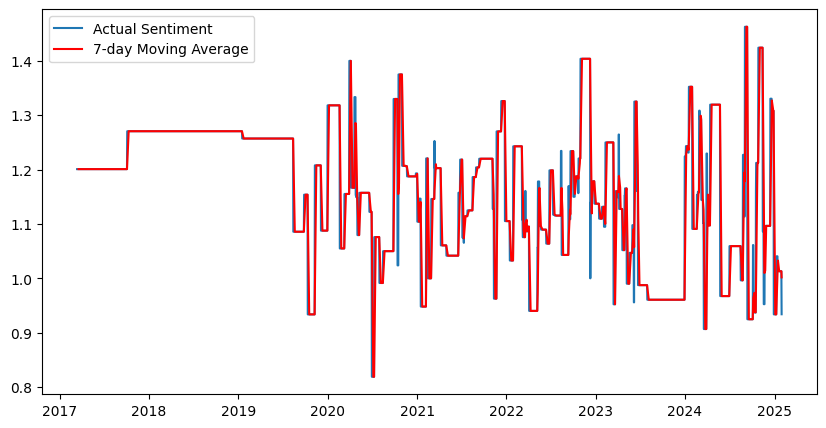

In [41]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Moving Average (7-day window)
daily_sentiment['moving_avg'] = daily_sentiment['sentiment'].rolling(window=7).mean()

# Plot Moving Average
plt.figure(figsize=(10,5))
plt.plot(daily_sentiment.index, daily_sentiment['sentiment'], label="Actual Sentiment")
plt.plot(daily_sentiment.index, daily_sentiment['moving_avg'], label="7-day Moving Average", color='red')
plt.legend()
plt.show()

Plotting the ACF and PACF to check is sentinments are dependent on previous sentiments

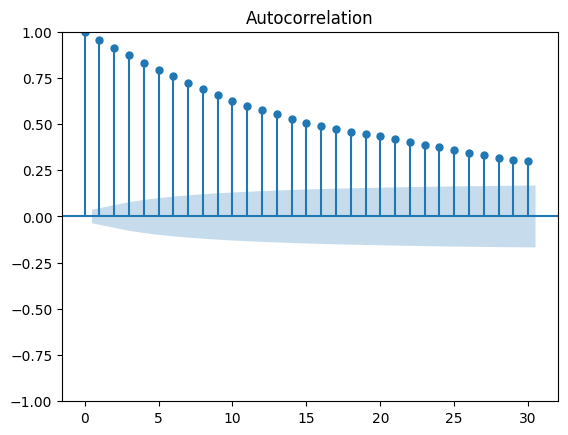

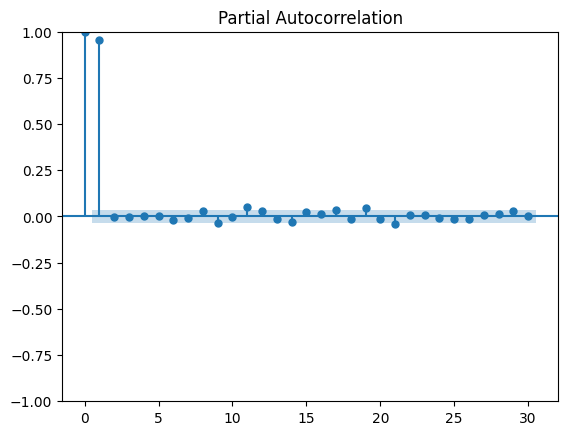

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(daily_sentiment['sentiment'], lags=30)  # Autocorrelation Plot
plot_pacf(daily_sentiment['sentiment'], lags=30)  # Partial Autocorrelation Plot
plt.show()

Now training ARIMA for the forcasting of sentiments

c:\Users\mohsi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



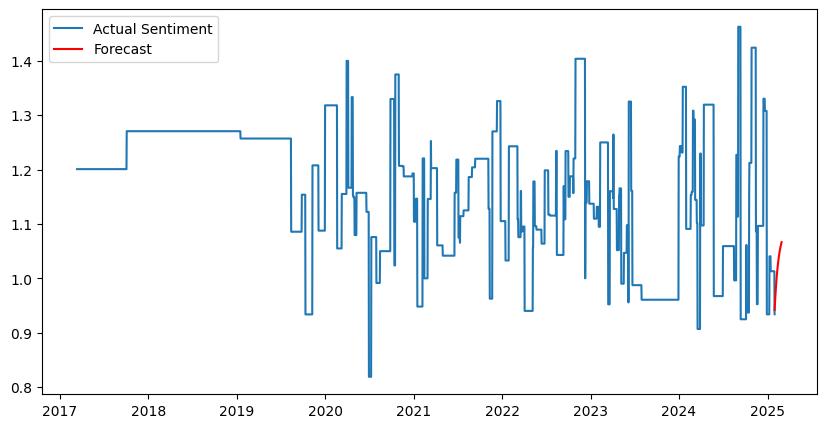

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model (p, d, q values tuning required)
model = ARIMA(daily_sentiment['sentiment'], order=(5,1,2))  # p, d, q parameters
model_fit = model.fit()

# Predict Next 30 Days
future_pred = model_fit.forecast(steps=30)

# Plot Predictions
plt.figure(figsize=(10,5))
plt.plot(daily_sentiment.index, daily_sentiment['sentiment'], label="Actual Sentiment")
plt.plot(pd.date_range(start=daily_sentiment.index[-1], periods=30, freq='D'), future_pred, label="Forecast", color='red')
plt.legend()
plt.show()

In [44]:
df['subreddit'].value_counts()

subreddit
chatgpt            58381
machinelearning     6339
datascience         4478
Name: count, dtype: int64

# Sentiment by subreddits

In [45]:
df3 = df[['subreddit' , 'post_timestamp' , 'sentiment']]

In [46]:
df3

,subreddit,post_timestamp,sentiment
74,datascience,2021-07-05 20:57:20,Positive
75,datascience,2021-07-05 20:57:20,Positive
76,datascience,2021-07-05 20:57:20,Positive
77,datascience,2021-07-05 20:57:20,Positive
78,datascience,2021-07-05 20:57:20,Positive
...,...,...,...
79285,chatgpt,2024-08-25 20:28:23,Neutral
79287,chatgpt,2024-08-25 20:28:23,Positive
79288,chatgpt,2024-08-25 20:28:23,Negative
79289,chatgpt,2024-08-25 20:28:23,Positive


In [47]:
df3['sentiment'] = df3['sentiment'].astype(str)

sentiment_mapping = {'Negative':0 , 'Positive':1 , 'Neutral':2}

df3['sentiment'] = df3['sentiment'].map(sentiment_mapping)

In [48]:
# Convert 'post_timestamp' to datetime format
df3['post_timestamp'] = pd.to_datetime(df3['post_timestamp'])

# Set 'post_timestamp' as index
df3.set_index('post_timestamp', inplace=True)

# Select only numeric columns before applying mean()
numeric_cols = df3.select_dtypes(include=['number'])

# Group by subreddit and resample sentiment scores daily
subreddit_trends = numeric_cols.groupby(df3["subreddit"]).resample("D").mean().fillna(0)

print(subreddit_trends.head())  # Check output


                          sentiment
subreddit post_timestamp           
chatgpt   2022-12-11       1.139344
          2022-12-12       0.000000
          2022-12-13       0.000000
          2022-12-14       0.000000
          2022-12-15       0.000000


In [49]:
subreddit_trends

sentiment
subreddit       post_timestamp           
chatgpt         2022-12-11       1.139344
                2022-12-12       0.000000
                2022-12-13       0.000000
                2022-12-14       0.000000
                2022-12-15       0.000000
...                                   ...
machinelearning 2023-06-02       0.000000
                2023-06-03       0.000000
                2023-06-04       0.000000
                2023-06-05       0.000000
                2023-06-06       0.955801

[5233 rows x 1 columns]

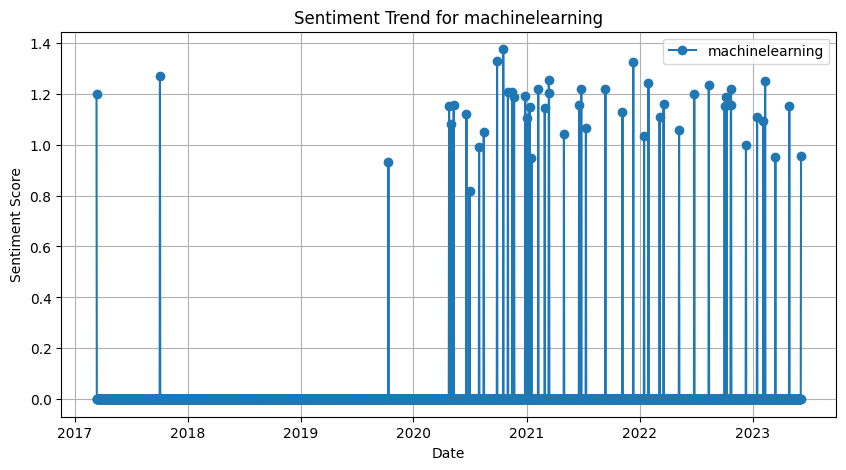

In [50]:
import matplotlib.pyplot as plt

subreddit_name = 'machinelearning'  # Change this to any subreddit
trend = subreddit_trends.loc[subreddit_name]  # Filter subreddit data

plt.figure(figsize=(10, 5))
plt.plot(trend.index, trend["sentiment"], marker="o", linestyle="-", label=subreddit_name)
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title(f"Sentiment Trend for {subreddit_name}")
plt.legend()
plt.grid(True)
plt.show()


# Training Facebook Prophet model

## Sentiment Forecasting according to subreddit

12:18:19 - cmdstanpy - INFO - Chain [1] start processing
12:18:20 - cmdstanpy - INFO - Chain [1] done processing


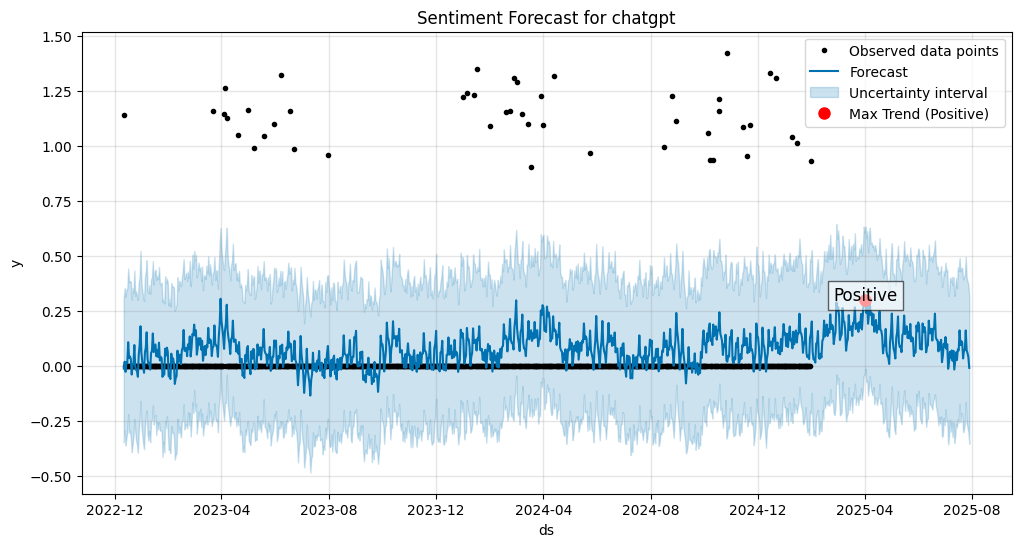

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

subreddit_name = "chatgpt"  # Select subreddit
trend = subreddit_trends.loc[subreddit_name].reset_index()  # Reset index

# Prophet requires 'ds' (date) and 'y' (target variable)
trend = trend.rename(columns={"post_timestamp": "ds", "sentiment": "y"})

# Train Forecasting Model
model = Prophet(
    changepoint_prior_scale=0.1,  # Higher value for more flexibility in trend changes
    yearly_seasonality=True,       
    weekly_seasonality=True,       
    daily_seasonality=False        
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

model.fit(trend)

# Predict Future 30 Days
future = model.make_future_dataframe(periods=180)  
forecast = model.predict(future)

# **Classify Sentiment Based on Predicted 'yhat'**
forecast["sentiment_category"] = np.where(forecast["yhat"] > 0.1, "Positive", 
                                 np.where(forecast["yhat"] < -0.1, "Negative", "Neutral"))

# **Find Maximum Trend Point for the Future**
future_forecast = forecast[forecast['ds'] > trend['ds'].max()]  # Filter future predictions
max_sentiment_row = future_forecast.loc[future_forecast['yhat'].idxmax()]  # Get row with max 'yhat'

max_date = max_sentiment_row['ds']
max_value = max_sentiment_row['yhat']

# Identify sentiment direction for the next trend
if max_value > 0.1:
    trend_direction = "Positive"
elif max_value < -0.1:
    trend_direction = "Negative"
else:
    trend_direction = "Neutral"

# **Plot Forecast with Trend Highlight**
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)

# Highlight the point of maximum yhat with a marker
ax.plot(max_date, max_value, 'ro', label=f'Max Trend ({trend_direction})', markersize=8)

# Add sentiment category label at the max point
ax.text(max_date, max_value, f'{trend_direction}', fontsize=12, color="black", ha="center", 
        bbox=dict(facecolor='white', alpha=0.6))

# Add title and legend
plt.title(f"Sentiment Forecast for {subreddit_name}")
ax.legend()

plt.show()


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

# Function to predict and find max trend based on given periods
def predict_and_plot(periods):
    subreddit_name = "chatgpt"  # Select subreddit
    trend = subreddit_trends.loc[subreddit_name].reset_index()  # Reset index

    # Prophet requires 'ds' (date) and 'y' (target variable)
    trend = trend.rename(columns={"post_timestamp": "ds", "sentiment": "y"})

    # Train Forecasting Model
    model = Prophet(
        changepoint_prior_scale=0.1,  # Higher value for more flexibility in trend changes
        yearly_seasonality=True,       
        weekly_seasonality=True,       
        daily_seasonality=False        
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

    model.fit(trend)

    # Predict Future with the provided periods
    future = model.make_future_dataframe(periods=periods)  
    forecast = model.predict(future)

    # **Classify Sentiment Based on Predicted 'yhat'**
    forecast["sentiment_category"] = np.where(forecast["yhat"] > 0.1, "Positive", 
                                         np.where(forecast["yhat"] < -0.1, "Negative", "Neutral"))

    # **Find Maximum Trend Point for the Future**
    future_forecast = forecast[forecast['ds'] > trend['ds'].max()]  # Filter future predictions
    max_sentiment_row = future_forecast.loc[future_forecast['yhat'].idxmax()]  # Get row with max 'yhat'

    max_date = max_sentiment_row['ds']
    max_value = max_sentiment_row['yhat']

    # Identify sentiment direction for the next trend
    if max_value > 0.1:
        trend_direction = "Positive"
    elif max_value < -0.1:
        trend_direction = "Negative"
    else:
        trend_direction = "Neutral"

    # **Plot Forecast with Trend Highlight**
    fig, ax = plt.subplots(figsize=(12, 6))
    model.plot(forecast, ax=ax)

    # Highlight the point of maximum yhat with a marker
    ax.plot(max_date, max_value, 'ro', label=f'Max Trend ({trend_direction})', markersize=8)

    # Add sentiment category label at the max point
    ax.text(max_date, max_value, f'{trend_direction}', fontsize=12, color="black", ha="center", 
            bbox=dict(facecolor='white', alpha=0.6))

    # Add title and legend
    plt.title(f"Sentiment Forecast for {subreddit_name} (Periods: {periods})")
    ax.legend()

    plt.show()



12:18:21 - cmdstanpy - INFO - Chain [1] start processing
12:18:21 - cmdstanpy - INFO - Chain [1] done processing


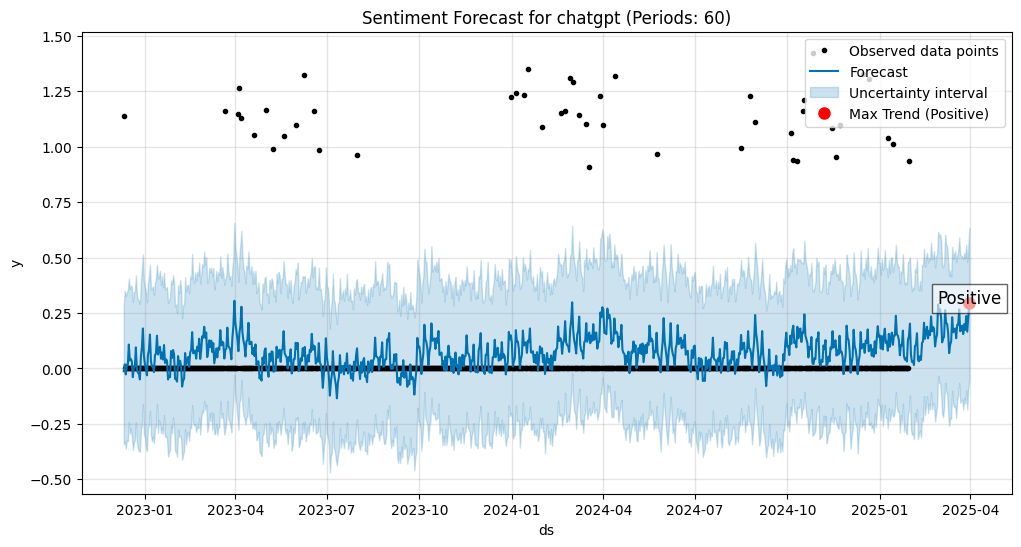

In [53]:
periods = 60
predict_and_plot(periods)

### All subreddits can be run in loop at once and according to range of date 

In [54]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from prophet import Prophet

# Function to predict and find max trend for each subreddit
def predict_and_plot(subreddit_name, periods, time_range='monthly'):
    trend = subreddit_trends.loc[subreddit_name].reset_index()  # Reset index
    trend = trend.rename(columns={"post_timestamp": "ds", "sentiment": "y"})

    # Classify Sentiment for Observed Data
    trend['sentiment_category'] = np.where(
        trend['y'] > 0.1, 'Positive', 
        np.where(trend['y'] < -0.1, 'Negative', 'Neutral')
    )

    # Train Forecasting Model
    model = Prophet(
        changepoint_prior_scale=0.1,  # Higher value for more flexibility
        yearly_seasonality=True,       
        weekly_seasonality=True,       
        daily_seasonality=False        
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(trend)

    # Predict Future with the provided periods
    future = model.make_future_dataframe(periods=periods)  
    forecast = model.predict(future)

    # Classify Sentiment Based on Predicted 'yhat'
    forecast["sentiment_category"] = np.where(
        forecast["yhat"] > 0.1, "Positive", 
        np.where(forecast["yhat"] < -0.1, "Negative", "Neutral")
    )

    # Find Maximum Trend Point for the Future
    future_forecast = forecast[forecast['ds'] > trend['ds'].max()]
    max_sentiment_row = future_forecast.loc[future_forecast['yhat'].idxmax()]
    max_date, max_value = max_sentiment_row['ds'], max_sentiment_row['yhat']
    
    trend_direction = "Positive" if max_value > 0.1 else "Negative" if max_value < -0.1 else "Neutral"

    # Plot using Plotly
    fig = go.Figure()

    # Add observed data points
    fig.add_trace(go.Scatter(x=trend[trend['sentiment_category'] == 'Positive']['ds'], 
                             y=trend[trend['sentiment_category'] == 'Positive']['y'],
                             mode='markers', name='Positive Sentiment', 
                             marker=dict(color='green', size=8)))

    fig.add_trace(go.Scatter(x=trend[trend['sentiment_category'] == 'Negative']['ds'], 
                             y=trend[trend['sentiment_category'] == 'Negative']['y'],
                             mode='markers', name='Negative Sentiment', 
                             marker=dict(color='red', size=8)))

    fig.add_trace(go.Scatter(x=trend[trend['sentiment_category'] == 'Neutral']['ds'], 
                             y=trend[trend['sentiment_category'] == 'Neutral']['y'],
                             mode='markers', name='Neutral Sentiment', 
                             marker=dict(color='blue', size=8)))

    # Add forecasted data line
    fig.add_trace(go.Scatter(x=forecast['ds'], 
                             y=forecast['yhat'], 
                             mode='lines', name='Forecasted Sentiment', 
                             line=dict(color='orange', width=2)))  # Changed forecast line color to orange

    # Highlight the max trend point
    fig.add_trace(go.Scatter(x=[max_date], y=[max_value], mode='markers+text',
                             marker=dict(color='red', size=10),
                             text=[f'Max Trend ({trend_direction})'],
                             textposition="top center", name='Max Trend'))

    # Add title and labels
    fig.update_layout(
        title=f"📈 Sentiment Forecast for {subreddit_name} (Periods: {periods})",
        xaxis_title="Date",
        yaxis_title="Sentiment Score",
        showlegend=True,
        template='plotly_dark',
        xaxis=dict(
            rangeslider=dict(visible=True),  # Adding the range slider for interactive zoom
            type='date'
        ),
    )

    # Show the plot
    fig.show()

# Example usage
subreddit_names = ["chatgpt", "machinelearning", "datascience"]
periods = 7  # Customize periods as needed (e.g., 30 days forecast)
for subreddit_name in subreddit_names:
    predict_and_plot(subreddit_name, periods, time_range='monthly')  # You can change time_range to 'weekly' or 'daily'


12:18:22 - cmdstanpy - INFO - Chain [1] start processing
12:18:22 - cmdstanpy - INFO - Chain [1] done processing


12:18:25 - cmdstanpy - INFO - Chain [1] start processing
12:18:25 - cmdstanpy - INFO - Chain [1] done processing


12:18:26 - cmdstanpy - INFO - Chain [1] start processing
12:18:26 - cmdstanpy - INFO - Chain [1] done processing


# Checking the Accuracy of Prophet model 

12:18:27 - cmdstanpy - INFO - Chain [1] start processing
12:18:27 - cmdstanpy - INFO - Chain [1] done processing


Accuracy for chatgpt:
MAE: 0.22
RMSE: 0.32
--------------------------------------------------


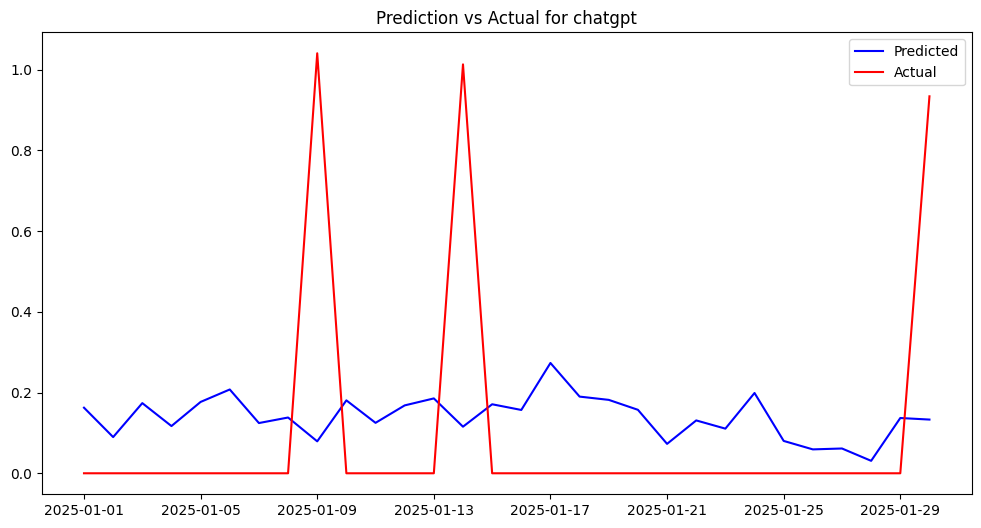

12:18:28 - cmdstanpy - INFO - Chain [1] start processing
12:18:29 - cmdstanpy - INFO - Chain [1] done processing


Accuracy for machinelearning:
MAE: 0.06
RMSE: 0.18
--------------------------------------------------


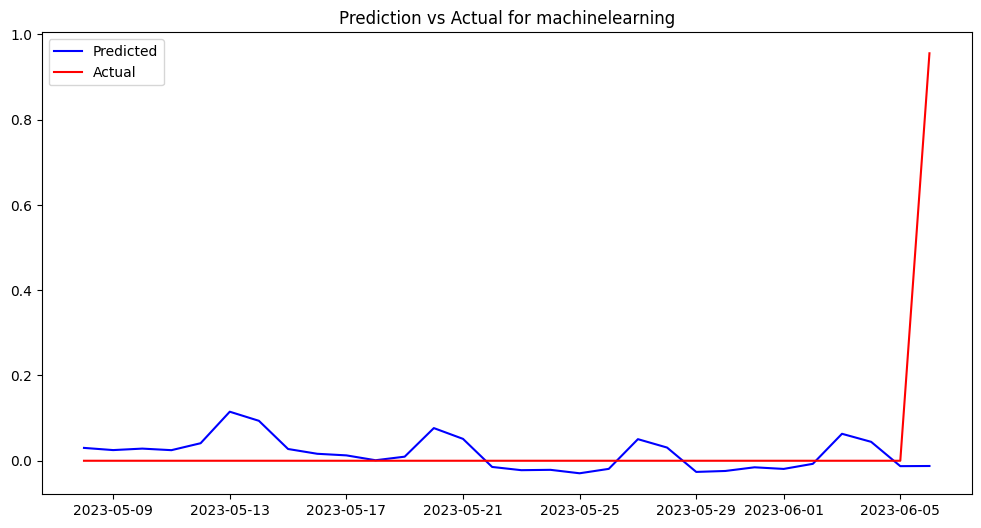

12:18:30 - cmdstanpy - INFO - Chain [1] start processing
12:18:30 - cmdstanpy - INFO - Chain [1] done processing


Accuracy for datascience:
MAE: 0.05
RMSE: 0.17
--------------------------------------------------


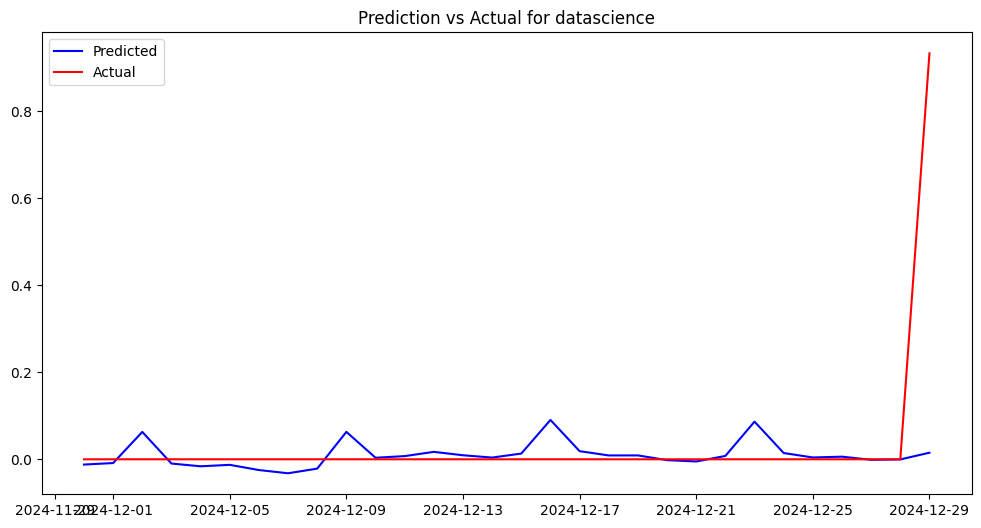

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Function to calculate accuracy metrics
def evaluate_model_accuracy(subreddit_name, periods):
    trend = subreddit_trends.loc[subreddit_name].reset_index()  # Reset index

    # Prophet requires 'ds' (date) and 'y' (target variable)
    trend = trend.rename(columns={"post_timestamp": "ds", "sentiment": "y"})

    # Train-Validation Split: Use last 30 days as validation set
    train_data = trend[:-30]
    validation_data = trend[-30:]

    # Train Forecasting Model
    model = Prophet(
        changepoint_prior_scale=0.1,
        yearly_seasonality=True,       
        weekly_seasonality=True,       
        daily_seasonality=False        
    )
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

    model.fit(train_data)

    # Predict Future (Validation Period)
    future = model.make_future_dataframe(periods=30)  # Forecast 30 days ahead
    forecast = model.predict(future)

    # **Compare Predictions with Actual (Validation) Data**
    # Merge forecast with actual data for validation period
    forecast = forecast[forecast['ds'].isin(validation_data['ds'])]  # Ensure same dates
    actual_values = validation_data['y'].values
    predicted_values = forecast['yhat'].values

    # Ensure lengths match
    if len(actual_values) != len(predicted_values):
        print(f"⚠️ Length mismatch: actual={len(actual_values)}, predicted={len(predicted_values)}")
        return

    # Calculate MAE, RMSE
    mae = mean_absolute_error(actual_values, predicted_values)
    rmse = sqrt(mean_squared_error(actual_values, predicted_values))

    print(f"Accuracy for {subreddit_name}:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print("-" * 50)

    # Plot the predictions vs actual values for the validation period
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='blue')
    ax.plot(validation_data['ds'], validation_data['y'], label='Actual', color='red')
    ax.legend()
    plt.title(f"Prediction vs Actual for {subreddit_name}")
    plt.show()

# Example: Evaluate model accuracy for multiple subreddits
subreddit_names = ["chatgpt", "machinelearning", "datascience"]  # List of subreddits
periods = 60  # Forecasting periods (change as needed)

for subreddit_name in subreddit_names:
    evaluate_model_accuracy(subreddit_name, periods)

Here we can see model is working well with datascience and machinelearning subreddit but not with chatgpt subreddit 

In [61]:
from fastapi import FastAPI, Form, HTTPException
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
from pydantic import BaseModel
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from datetime import datetime
from starlette.requests import Request
from prophet import Prophet

# Initialize FastAPI
app = FastAPI()

# Set up Jinja2 templates for rendering HTML
templates = Jinja2Templates(directory="templates")

# Pydantic model for capturing user input
class ForecastRequest(BaseModel):
    subreddit_name: str
    periods: int
    time_range: str  # Added time range option again
    graph_type: str  

# Dummy Data (replace with actual data scraping or database)
subreddit_trends = {
    "chatgpt": pd.DataFrame({"post_timestamp": pd.date_range(start="2022-01-01", periods=100, freq="D"), "sentiment": np.random.randn(100)}),
    "machinelearning": pd.DataFrame({"post_timestamp": pd.date_range(start="2022-01-01", periods=100, freq="D"), "sentiment": np.random.randn(100)}),
    "datascience": pd.DataFrame({"post_timestamp": pd.date_range(start="2022-01-01", periods=100, freq="D"), "sentiment": np.random.randn(100)}),
}

# Function to assign colors based on sentiment value
def assign_sentiment_color(sentiment_value):
    if sentiment_value > 0.1:
        return "green"
    elif sentiment_value < -0.1:
        return "red"
    else:
        return "yellow"

# Function to generate forecast plot
def predict_and_plot(subreddit_name, periods, time_range, graph_type):
    trend = subreddit_trends[subreddit_name].reset_index()
    trend = trend.rename(columns={"post_timestamp": "ds", "sentiment": "y"})
    
    # Assign colors based on sentiment values
    trend['color'] = trend['y'].apply(assign_sentiment_color)
    
    # Train Prophet model
    model = Prophet(changepoint_prior_scale=0.1, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    model.fit(trend)

    # Predict Future
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)

    # Filter data based on time range selection
    if time_range == "weekly":
        trend = trend[trend["ds"] >= (trend["ds"].max() - pd.Timedelta(weeks=1))]
        forecast = forecast[forecast["ds"] >= (forecast["ds"].max() - pd.Timedelta(weeks=1))]
    elif time_range == "monthly":
        trend = trend[trend["ds"] >= (trend["ds"].max() - pd.Timedelta(days=30))]
        forecast = forecast[forecast["ds"] >= (forecast["ds"].max() - pd.Timedelta(days=30))]

    # Plot using Plotly
    fig = go.Figure()

    if graph_type == "scatter":
        fig.add_trace(go.Scatter(x=trend['ds'], y=trend['y'], mode='markers', name='Observed Sentiment', marker=dict(color=trend['color'])))
        fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecasted Sentiment', line=dict(color='orange')))
    else:
        fig.add_trace(go.Bar(x=trend['ds'], y=trend['y'], name='Observed Sentiment', marker=dict(color=trend['color'])))
        fig.add_trace(go.Bar(x=forecast['ds'], y=forecast['yhat'], name='Forecasted Sentiment', marker=dict(color='orange')))
        fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Trend Line', line=dict(color='blue', width=2)))
    
    # Add Range Slider & Range Selector
    fig.update_layout(
        title=f"📈 Sentiment Forecast for {subreddit_name} ({graph_type.capitalize()} Graph)",
        xaxis_title="Date", 
        yaxis_title="Sentiment Score",
        showlegend=True, 
        template='plotly_dark',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=7, label="1W", step="day", stepmode="backward"),
                    dict(count=1, label="1M", step="month", stepmode="backward"),
                    dict(count=3, label="3M", step="month", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        )
    )
    
    return fig.to_html(full_html=False)

# Root endpoint to display the UI form
@app.get("/", response_class=HTMLResponse)
async def index(request: Request):
    return templates.TemplateResponse("index.html", {"request": request})

# Endpoint to handle form submission and plot generation
@app.post("/generate_forecast/")
async def generate_forecast(request: Request, subreddit_name: str = Form(...), periods: int = Form(...), time_range: str = Form(...), graph_type: str = Form(...)):
    try:
        plot_html = predict_and_plot(subreddit_name, periods, time_range, graph_type)
        return templates.TemplateResponse("index.html", {"request": request, "graph_html": plot_html})
    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Error generating forecast: {str(e)}")